## 기상청 자료
https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
- 거제(294)
- 평균기온(°C)  
- 일강수량(mm)  
- 평균 풍속(m/s)  
- 평균 상대습도(%)
- 평균 현지기압(hPa) 
- 20140101 - 20231231
- 일자료

## 미세먼지 자료
https://www.airkorea.or.kr/web/last_amb_hour_data?pMENU_NO=123
- 2014 ~ 2013 년 자료 다운로드
- 각 폴더별 풀기
- 거제 관련 데이터를 추출하여
- 일 평균을 구한다.


### 파일을 읽어 통합한다.
- 측정소의 약간의 차이는 무시 한다. (기상데이터 측정:기상관측소, 미세먼지 측정 : 고현동 시청, 과거데이터가 없는 것은 아주동 데이터 사용)
- 수행하는 데 약 1시간 걸림

In [32]:
import os
import pandas as pd

def read_selected_excel(root_dir):
    df_total = pd.DataFrame()
    
    # root_dir에서 시작하는 모든 파일과 폴더를 탐색합니다.
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            # 엑셀 파일만 처리합니다.
            if file.endswith('.xlsx'):
                file_path = os.path.join(root, file)  # 파일의 전체 경로를 얻습니다.
                df = pd.read_excel(file_path)  # 파일을 읽어서 DataFrame으로 만듭니다.
                # '측정소명'이 '고현동'인 데이터만 선택합니다.
                df_selected = df[df['측정소명'] == '고현동']
                if df_selected.size == 0:
                    df_selected = df[df['측정소명'] == '아주동']
                print(file_path, df_selected.size)
                df_total = pd.concat([df_total, df_selected])  # 새로 읽은 DataFrame을 기존 DataFrame에 추가합니다.

    return df_total

# 함수를 호출하여 'data' 폴더 안의 모든 엑셀 파일을 읽습니다.
df = read_selected_excel('data')

# 결과를 확인합니다.
print(df.head())
df.size

data\2014\2014년 1분기.xlsx 25920
data\2014\2014년 2분기.xlsx 26208
data\2014\2014년 3분기.xlsx 26496
data\2014\2014년 4분기.xlsx 26496
data\2015\2015년 1분기.xlsx 25920
data\2015\2015년 2분기.xlsx 26208
data\2015\2015년 3분기.xlsx 26496
data\2015\2015년 4분기.xlsx 26496
data\2016\2016년 1분기.xlsx 26208
data\2016\2016년 2분기.xlsx 26208
data\2016\2016년 3분기.xlsx 26496
data\2016\2016년 4분기.xlsx 26496
data\2017\2017년 01월.xlsx 8928
data\2017\2017년 02월.xlsx 8064
data\2017\2017년 03월.xlsx 8928
data\2017\2017년 04월.xlsx 8640
data\2017\2017년 05월.xlsx 8928
data\2017\2017년 06월.xlsx 8640
data\2017\2017년 07월.xlsx 8928
data\2017\2017년 08월.xlsx 8928
data\2017\2017년 09월.xlsx 8640
data\2017\2017년 10월.xlsx 8928
data\2017\2017년 11월.xlsx 8640
data\2017\2017년 12월.xlsx 8928
data\2018\2018년 10월.xlsx 8928
data\2018\2018년 11월.xlsx 8640
data\2018\2018년 12월.xlsx 8928
data\2018\2018년 1월.xlsx 8928
data\2018\2018년 2월.xlsx 8064
data\2018\2018년 3월.xlsx 8928
data\2018\2018년 4월.xlsx 8640
data\2018\2018년 5월.xlsx 8928
data\2018\2018년 6월.xlsx 8640
data

1019520

In [33]:
# 결과를 엑셀 파일로 저장합니다.
df.to_excel('2014-2023_거제.xlsx', index=False)

In [39]:
# 판다스와 넘파이 라이브러리를 import 합니다.
import pandas as pd
import numpy as np

# 'result.xlsx' 파일을 DataFrame으로 읽어옵니다.
df = pd.read_excel('2014-2023_거제.xlsx')

# '측정일시' 칼럼을 문자열로 변환합니다.
df['측정일시'] = df['측정일시'].astype(str)

# '년월일' 칼럼을 추가합니다. '측정일시'에서 앞의 8자리만 선택합니다.
df['년월일'] = df['측정일시'].str[:8]
print(df.head())
df_avg = df.groupby('년월일')[['PM10','PM25']].mean().reset_index()
# # '년월일'로 그룹화하여 'CO2'의 평균을 계산합니다.
print(df_avg.head())
df_avg.size
# df_co2_avg = df.groupby('년월일')['CO2'].mean().reset_index()

# # 결과를 확인합니다.
# print(df_co2_avg.head())


       지역     망   측정소코드 측정소명        측정일시    SO2   CO     O3    NO2   PM10  \
0  경남 거제시  도시대기  238201  아주동  2014010101  0.012  0.7  0.029  0.014  133.0   
1  경남 거제시  도시대기  238201  아주동  2014010102  0.013  0.7  0.025  0.017  139.0   
2  경남 거제시  도시대기  238201  아주동  2014010103  0.014  0.8  0.023  0.018  132.0   
3  경남 거제시  도시대기  238201  아주동  2014010104  0.013  0.8  0.022  0.017  140.0   
4  경남 거제시  도시대기  238201  아주동  2014010105  0.014  0.8  0.020  0.018  143.0   

   PM25                 주소       년월일  
0   NaN  경남 거제시 아주동 산164-1  20140101  
1   NaN  경남 거제시 아주동 산164-1  20140101  
2   NaN  경남 거제시 아주동 산164-1  20140101  
3   NaN  경남 거제시 아주동 산164-1  20140101  
4   NaN  경남 거제시 아주동 산164-1  20140101  
        년월일        PM10  PM25
0  20140101  117.541667   NaN
1  20140102   75.041667   NaN
2  20140103   49.666667   NaN
3  20140104   62.250000   NaN
4  20140105   39.208333   NaN


10620

In [40]:
# 판다스 라이브러리를 import 합니다.
import pandas as pd

# '기상_2014-2023.xlsx' 파일을 DataFrame으로 읽어옵니다.
df = pd.read_excel('기상_2014-2023.xlsx')

# 결과를 확인합니다.
print(df.head())


    지점 지점명         일시  평균기온(°C)  일강수량(mm)  평균 풍속(m/s)  평균 상대습도(%)  \
0  294  거제 2014-01-01       7.5       NaN         2.3        39.3   
1  294  거제 2014-01-02       5.1       NaN         0.7        44.5   
2  294  거제 2014-01-03       5.4       NaN         0.7        45.9   
3  294  거제 2014-01-04       5.8       NaN         1.0        53.8   
4  294  거제 2014-01-05       4.7       NaN         1.1        52.1   

   평균 현지기압(hPa)  
0        1009.9  
1        1015.1  
2        1011.2  
3        1011.5  
4        1015.8  


In [41]:
# '일시' 칼럼을 문자열로 변환합니다.
df['일시'] = df['일시'].astype(str)

# 문자열로 변환된 '일시' 칼럼에서 '-'를 제거하여 '년월일' 칼럼을 생성합니다.
df['년월일'] = df['일시'].str.replace('-', '')

# 결과를 확인합니다.
print(df.head())


    지점 지점명          일시  평균기온(°C)  일강수량(mm)  평균 풍속(m/s)  평균 상대습도(%)  \
0  294  거제  2014-01-01       7.5       NaN         2.3        39.3   
1  294  거제  2014-01-02       5.1       NaN         0.7        44.5   
2  294  거제  2014-01-03       5.4       NaN         0.7        45.9   
3  294  거제  2014-01-04       5.8       NaN         1.0        53.8   
4  294  거제  2014-01-05       4.7       NaN         1.1        52.1   

   평균 현지기압(hPa)       년월일  
0        1009.9  20140101  
1        1015.1  20140102  
2        1011.2  20140103  
3        1011.5  20140104  
4        1015.8  20140105  


In [42]:
# '년월일' 칼럼을 인덱스로 설정합니다.
df.set_index('년월일', inplace=True)

# 결과를 확인합니다.
print(df.head())

           지점 지점명          일시  평균기온(°C)  일강수량(mm)  평균 풍속(m/s)  평균 상대습도(%)  \
년월일                                                                         
20140101  294  거제  2014-01-01       7.5       NaN         2.3        39.3   
20140102  294  거제  2014-01-02       5.1       NaN         0.7        44.5   
20140103  294  거제  2014-01-03       5.4       NaN         0.7        45.9   
20140104  294  거제  2014-01-04       5.8       NaN         1.0        53.8   
20140105  294  거제  2014-01-05       4.7       NaN         1.1        52.1   

          평균 현지기압(hPa)  
년월일                     
20140101        1009.9  
20140102        1015.1  
20140103        1011.2  
20140104        1011.5  
20140105        1015.8  


In [43]:
# df와 df_avg를 '년월일' 칼럼을 기준으로 연결합니다.
df = df.merge(df_avg, how='left', on='년월일')

# 결과를 확인합니다.
print(df.head())


        년월일   지점 지점명          일시  평균기온(°C)  일강수량(mm)  평균 풍속(m/s)  평균 상대습도(%)  \
0  20140101  294  거제  2014-01-01       7.5       NaN         2.3        39.3   
1  20140102  294  거제  2014-01-02       5.1       NaN         0.7        44.5   
2  20140103  294  거제  2014-01-03       5.4       NaN         0.7        45.9   
3  20140104  294  거제  2014-01-04       5.8       NaN         1.0        53.8   
4  20140105  294  거제  2014-01-05       4.7       NaN         1.1        52.1   

   평균 현지기압(hPa)        PM10  PM25  
0        1009.9  117.541667   NaN  
1        1015.1   75.041667   NaN  
2        1011.2   49.666667   NaN  
3        1011.5   62.250000   NaN  
4        1015.8   39.208333   NaN  


In [44]:
# 결과를 엑셀 파일로 저장합니다.
df.to_excel('2014-2023_데이터전처리_거제.xlsx', index=False)

In [45]:
import pandas as pd

# Excel 파일을 읽어서 DataFrame 객체로 만듭니다.
df = pd.read_excel('2014-2023_데이터전처리_거제.xlsx')

# 데이터를 확인합니다.
print(df.head())
df.size

        년월일   지점 지점명          일시  평균기온(°C)  일강수량(mm)  평균 풍속(m/s)  평균 상대습도(%)  \
0  20140101  294  거제  2014-01-01       7.5       NaN         2.3        39.3   
1  20140102  294  거제  2014-01-02       5.1       NaN         0.7        44.5   
2  20140103  294  거제  2014-01-03       5.4       NaN         0.7        45.9   
3  20140104  294  거제  2014-01-04       5.8       NaN         1.0        53.8   
4  20140105  294  거제  2014-01-05       4.7       NaN         1.1        52.1   

   평균 현지기압(hPa)        PM10  PM25  
0        1009.9  117.541667   NaN  
1        1015.1   75.041667   NaN  
2        1011.2   49.666667   NaN  
3        1011.5   62.250000   NaN  
4        1015.8   39.208333   NaN  


40161

In [51]:
df = df.dropna()

# 결과를 확인합니다.
print(df.head())
df.size


          년월일   지점 지점명          일시  평균기온(°C)  일강수량(mm)  평균 풍속(m/s)  \
369  20150105  294  거제  2015-01-05       5.9       4.5         0.6   
370  20150106  294  거제  2015-01-06       8.1      17.0         3.0   
378  20150114  294  거제  2015-01-14       4.4       8.0         0.5   
379  20150115  294  거제  2015-01-15       5.8       1.5         1.1   
385  20150121  294  거제  2015-01-21       5.3       6.5         0.7   

     평균 상대습도(%)  평균 현지기압(hPa)       PM10       PM25  
369        72.8        1011.8  82.333333  53.083333  
370        48.6        1005.8  30.416667  20.000000  
378        79.0        1019.9  33.250000  24.916667  
379        71.0        1014.9  29.500000  20.666667  
385        79.4        1015.8  57.708333  43.541667  


10714

In [52]:
# 필요한 칼럼들을 선택합니다.
columns = ['평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)', '평균 현지기압(hPa)', 'PM10']
sub_df = df[columns]

# 상관계수를 계산합니다.
correlation = sub_df.corr()

# 결과를 출력합니다.
print(correlation)


              평균기온(°C)  일강수량(mm)  평균 풍속(m/s)  평균 상대습도(%)  평균 현지기압(hPa)  \
평균기온(°C)      1.000000  0.166273    0.151433    0.476122     -0.648505   
일강수량(mm)      0.166273  1.000000    0.255323    0.347955     -0.306372   
평균 풍속(m/s)    0.151433  0.255323    1.000000   -0.147061     -0.325592   
평균 상대습도(%)    0.476122  0.347955   -0.147061    1.000000     -0.368886   
평균 현지기압(hPa) -0.648505 -0.306372   -0.325592   -0.368886      1.000000   
PM10         -0.308629 -0.216931   -0.043713   -0.270316      0.270607   

                  PM10  
평균기온(°C)     -0.308629  
일강수량(mm)     -0.216931  
평균 풍속(m/s)   -0.043713  
평균 상대습도(%)   -0.270316  
평균 현지기압(hPa)  0.270607  
PM10          1.000000  


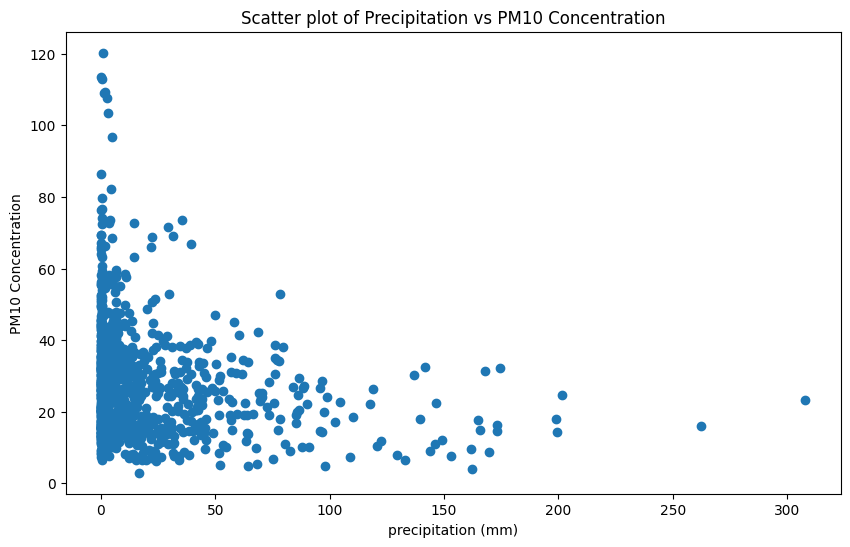

In [53]:
import matplotlib.pyplot as plt

# 산점도를 그립니다.
plt.figure(figsize=(10, 6))
plt.scatter(df['일강수량(mm)'], df['PM10'])
plt.xlabel('precipitation (mm)')
plt.ylabel('PM10 Concentration')
plt.title('Scatter plot of Precipitation vs PM10 Concentration')
plt.show()

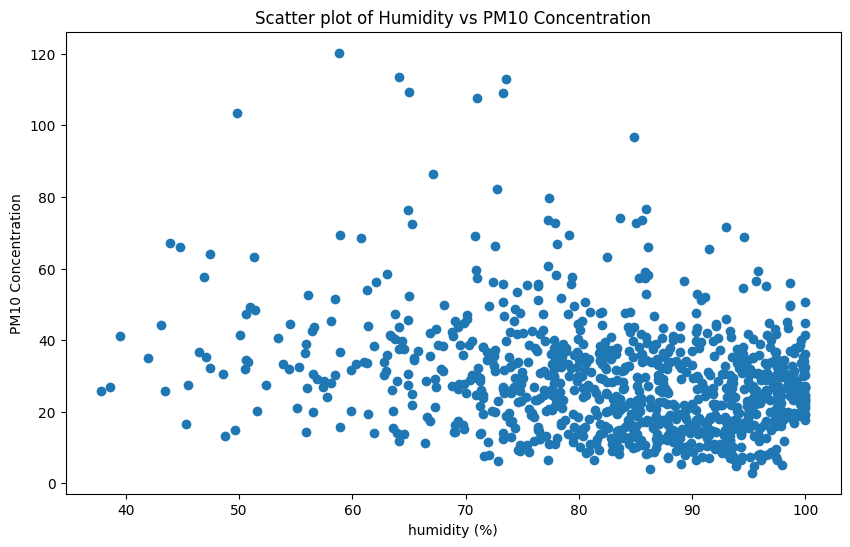

In [54]:
import matplotlib.pyplot as plt

# 산점도를 그립니다.
plt.figure(figsize=(10, 6))
plt.scatter(df['평균 상대습도(%)'], df['PM10'])
plt.xlabel('humidity (%)')
plt.ylabel('PM10 Concentration')
plt.title('Scatter plot of Humidity vs PM10 Concentration')
plt.show()

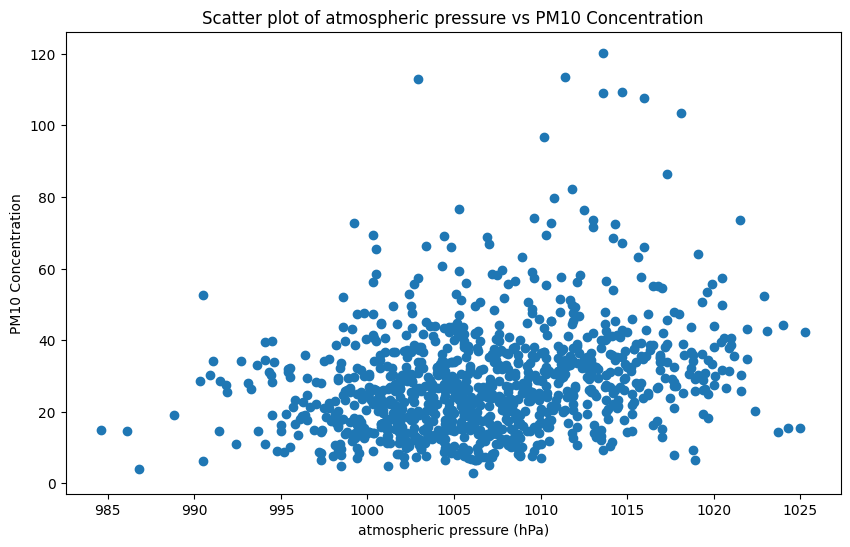

In [59]:
import matplotlib.pyplot as plt

# 산점도를 그립니다.
plt.figure(figsize=(10, 6))
plt.scatter(df['평균 현지기압(hPa)'], df['PM10'])
plt.xlabel('atmospheric pressure (hPa)')
plt.ylabel('PM10 Concentration')
plt.title('Scatter plot of atmospheric pressure vs PM10 Concentration')
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

X = df[['일강수량(mm)', '평균 상대습도(%)','평균 현지기압(hPa)']] # 독립 변수
y = df['PM10'] # 종속 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error: 10.052926459312596
Mean Squared Error: 174.43607660604496
Root Mean Squared Error: 13.207425055855701


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

X = df[['일강수량(mm)', '평균 상대습도(%)','평균 현지기압(hPa)']] # 독립 변수
y = df['PM10'] # 종속 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error: 10.842142859976795
Mean Squared Error: 203.14143376885562
Root Mean Squared Error: 14.252769336829093


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import numpy as np

X = df[['일강수량(mm)', '평균 상대습도(%)','평균 현지기압(hPa)']] # 독립 변수
y = df['PM10'] # 종속 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error: 10.299406300757104
Mean Squared Error: 189.23271628176147
Root Mean Squared Error: 13.756188290429929


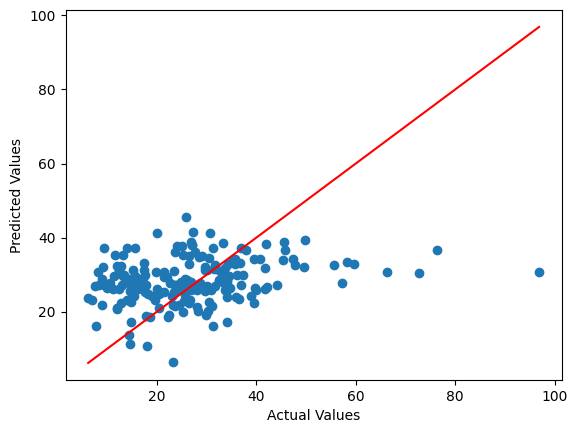

In [61]:
import matplotlib.pyplot as plt

# 실제 값과 예측 값의 산점도
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# x=y 선 그리기. 완벽한 예측 모델일 경우에는 모든 점이 이 선 위에 놓임.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()
